In [1]:
# from pvtm import comparison as cc
# import pvtm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pvtm import  pvtm_utils

%load_ext autoreload
%autoreload 2

C:\Users\Dlenz\Anaconda3\envs\py35\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dlenz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
args={}
args['path1'] = 'outputs_paper/JSE_065'
args['path2'] = 'outputs_paper/RWE_065'
args['path3'] = 'outputs_paper/JSE_RWE_065'

args['name_corpus_one'] = 'JSE'
args['name_corpus_two'] = 'RWE'
args['name_corpus_one_long'] = 'Journal of Statistics and Economics'
args['name_corpus_two_long'] = 'Review of World Economics'

args['output'] = "comparison_results_{}_{}".format(args['name_corpus_one'], args['name_corpus_two'])
args['vectorizermax'] = 0.5
args['vectorizermin'] = 0.01

args['agg_lvl'] = 'year'
args['k_timesteps'] = 3
args['rows'] = 5
args['cols'] = 5
args["tsne_perplexity"] = 15

In [3]:
! cat outputs_paper/JSE/file.txt | python -m json.tool

cat: outputs_paper/JSE/file.txt: No such file or directory
Expecting value: line 1 column 1 (char 0)


In [4]:

# # Load pvtm outputs
model1, gmm1, data1, topics1 = pvtm_utils.load_pvtm_outputs(args['path1'])
model2, gmm2, data2, topics2 = pvtm_utils.load_pvtm_outputs(args['path2'])
model3, gmm3, data3, topics3 = pvtm_utils.load_pvtm_outputs(args['path3'])


load document dataframe
start reading csv...
Tokenization took: 531.10 ms
Type conversion took: 921.68 ms
Parser memory cleanup took: 0.00 ms
finished reading csv file. start date conversion
finished date conversion, evaluate columns where necessary...
gmm_topics
gmm_probas
load document dataframe
start reading csv...
Tokenization took: 577.98 ms
Type conversion took: 1046.64 ms
Parser memory cleanup took: 0.00 ms
finished reading csv file. start date conversion
finished date conversion, evaluate columns where necessary...
gmm_topics
gmm_probas
load document dataframe
start reading csv...
Tokenization took: 1119.65 ms
Type conversion took: 1905.82 ms
Parser memory cleanup took: 0.00 ms
finished reading csv file. start date conversion
finished date conversion, evaluate columns where necessary...
gmm_topics
gmm_probas


# Bhtsne plots

In [5]:
bhtsne1 = pd.read_csv(args['path1'] + '/bhtsne_with_center.csv', names=['x', 'y'])
bhtsne2 = pd.read_csv(args['path2'] + '/bhtsne_with_center.csv', names=['x', 'y'])
bhtsne3 = pd.read_csv(args['path3'] + '/bhtsne_with_center.csv', names=['x', 'y'])


# split data in original corpora to find bhtsne indices
data3_data1 = data3.loc[data3.source == args['name_corpus_one']].copy()
data3_data2 = data3.loc[data3.source == args['name_corpus_two']].copy()
bh1 = bhtsne3.iloc[data3_data1.index]
bh2 = bhtsne3.iloc[data3_data2.index]


In [6]:
print(plt.style.available)
# sns.set(style='darkgrid')
plt.style.use('seaborn-paper')
plt.rcParams['axes.grid'] = True
# plt.rc('font', family='DejaVu Sans', serif='Times')
# plt.rc('text', usetex=False)
# plt.rc('xtick', labelsize=8)
# plt.rc('ytick', labelsize=8)
# plt.rc('axes', labelsize=8)
# plt.rcParams["mathtext.fontset"] = "stix"

['fast', 'seaborn-pastel', 'seaborn-ticks', 'seaborn-talk', 'seaborn-poster', 'seaborn-paper', 'seaborn-white', 'dark_background', 'seaborn-whitegrid', 'seaborn-dark-palette', 'seaborn', 'tableau-colorblind10', 'ggplot', 'seaborn-muted', 'seaborn-deep', 'seaborn-colorblind', '_classic_test', 'seaborn-dark', 'classic', 'Solarize_Light2', 'grayscale', 'fivethirtyeight', 'seaborn-bright', 'seaborn-darkgrid', 'seaborn-notebook', 'bmh']


png
pdf


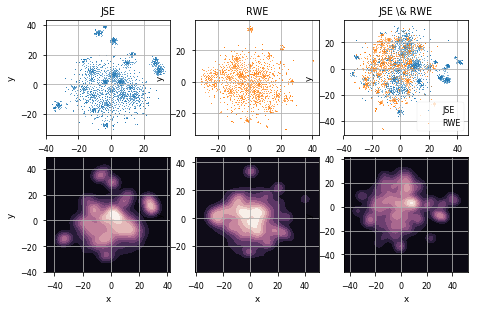

In [7]:


width  = 3.487 * 2
height = width / 1.618

f, axes = plt.subplots(2, 3, figsize=(width,height))

f.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)



sns.regplot(bhtsne1['x'],bhtsne1["y"],scatter_kws={'s':1}, fit_reg=False,  ax=axes[0][0],).set_title(args['name_corpus_one'])
sns.regplot(bhtsne2['x'],bhtsne2["y"],scatter_kws={'s':1}, fit_reg=False,  ax=axes[0][1],).set_title(args['name_corpus_two'])
sns.regplot(bh1['x'],bh1["y"],scatter_kws={'s':0.5}, color='C0', fit_reg=False,  ax=axes[0][2], label = args['name_corpus_one']).set_title(args['name_corpus_one'] + " \& " + args['name_corpus_two'] )
sns.regplot(bh2['x'],bh2["y"],scatter_kws={'s':0.5}, color='C1', fit_reg=False,  ax=axes[0][2], label = args['name_corpus_two']).set_title(args['name_corpus_one'] + " \& " + args['name_corpus_two'] )
axes[0][2].legend(loc="best")


cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(bhtsne1['x'],bhtsne1["y"], cmap=cmap, shade=True, ax=axes[1][0])
sns.kdeplot(bhtsne2['x'],bhtsne2["y"], cmap=cmap, shade=True, ax=axes[1][1])
sns.kdeplot(bhtsne3['x'],bhtsne3["y"], cmap=cmap, shade=True, ax=axes[1][2])


savepath = '{}/'.format(args['output'])
pvtm_utils.check_path(savepath)
for ending in ['png','pdf']:
    print(ending)
    plt.savefig('{}tsne_vergleich.{}'.format(savepath, ending), bbox_inches='tight')
    
# plt.savefig('{}tsne_vergleich.png'.format(savepath), bbox_inches='tight')
# plt.savefig('{}tsne_vergleich.pdf'.format(savepath), bbox_inches='tight')
# pvtm_utils.svg_to_pdf('{}tsne_vergleich.svg'.format(savepath))

In [8]:
def assign_df_tex_string_to_disk(args):
    df = pd.read_csv(args['output']+'/matching/assign.csv', index_col=0)
    texstring = df.T.to_latex()
    with open('{}/tex_assign.txt'.format(args['output']), 'w') as file:
        file.write(texstring)
    return df
assign = assign_df_tex_string_to_disk(args)

In [9]:
group3_1 = data3_data1.groupby('gmm_top_topic').title.count()
group3_2 = data3_data2.groupby('gmm_top_topic').title.count()
matching_importance = pd.DataFrame(pd.DataFrame(data3.groupby(['source', 'gmm_top_topic']).title.count()).unstack()).T
matching_importance = pd.DataFrame(matching_importance.values)
matching_importance.columns = ['x','y']
matching_importance.fillna(0).T

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
x,0.0,29.0,57.0,1.0,64.0,22.0,0.0,50.0,39.0,64.0,...,74.0,31.0,53.0,232.0,33.0,52.0,32.0,76.0,71.0,12.0
y,4.0,37.0,0.0,34.0,31.0,19.0,1.0,25.0,2.0,61.0,...,41.0,118.0,37.0,20.0,6.0,37.0,0.0,46.0,46.0,72.0


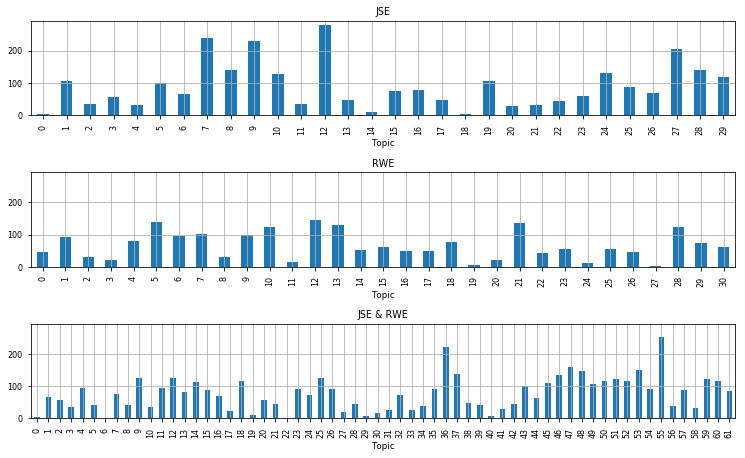

In [10]:

width  = 3.487 * 3
height = width / 1.618

f, axes = plt.subplots(3, 1, figsize=(width,height), sharey=True)

# f.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

data1.groupby('gmm_top_topic').title.count().plot(kind='bar', color='C0', ax=axes[0], title= args['name_corpus_one']).set_xlabel('Topic')
data2.groupby('gmm_top_topic').title.count().plot(kind='bar', color='C0', ax=axes[1], title= args['name_corpus_two']).set_xlabel('Topic')
data3.groupby('gmm_top_topic').title.count().plot(kind='bar', color='C0', ax=axes[2], title= args['name_corpus_one'] + ' & ' + args['name_corpus_two']).set_xlabel('Topic')
#
# sns.barplot(data = matching_importance.T, color='C0', ax=axes[2][1], label=['a','b'])
# axes[2][1].legend(loc='best')
# sns.barplot(x=group3_2.index.values, y = group3_2.values, color='C1', ax=axes[0][1])
# data3_data2.groupby('gmm_top_topic').title.count().plot(kind='bar', color='C1', ax=axes[0][1])
# data3_data2.groupby('gmm_top_topic').title.count().plot(kind='bar', color='C1', ax=axes[0][1])


plt.tight_layout()

savepath = '{}/'.format(args['output'])
pvtm_utils.check_path(savepath)
for ending in ['png','svg','pdf']:
    plt.savefig('{}topic_importance_vergleich.{}'.format(savepath, ending), bbox_inches='tight')

In [11]:
1

1

# Timelines

In [12]:

def timelines_overview(importance1, importance2, args, smoothing=3, grid=True, title=None):
    """
    Produce an overview figure with topic importance over time for (rows * cols) topics.
    Assumes that related topics are in the same order in both importance dataframes.
    Takes two outputs from pvtm_utils.topic_importance_df as input.
    This is a df holding topic importance measures over time.
    """

    f, ax = plt.subplots(args['rows'], args['cols'],
                         figsize=(args['cols'] * 3.7, args['rows'] * 4))
    k = 0
    for row in range(args['rows']):
        for col in range(args['cols']):

            try:

                importance1.iloc[:, k].ewm(span=smoothing).mean().plot(ax=ax[row][col],
                                                               label='{} ({})'.format(args['name_corpus_one'],
                                                                                      importance1.columns.values[k]),
                                                               legend=True)
                importance2.iloc[:, k].ewm(span=smoothing).mean().plot(ax=ax[row][col],linestyle='-.',
                                                               label='{} ({})'.format(args['name_corpus_two'],
                                                                                      importance2.columns.values[k]),
                                                               legend=True)

                ax[row][col].set_ylabel('Probability')
                ax[row][col].set_xlabel('Year')
                ax[row][col].set_title('Topic: {}'.format(k))

                if not grid:
                    ax[row][col].grid()

                k += 1
            except Exception as e:
                print(e)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                        wspace=0.35)

    # save timelines
    if title:
        args['model'] = title
    print('savinng overview to', args['model'])
    savepath = '{}/{}/'.format(args['output'], args['model'])
    pvtm_utils.check_path(savepath)
#     plt.savefig('{}{}_timeline_overview.svg'.format(savepath, args['model']), bbox_inches='tight')
    plt.savefig('{}{}_timeline_overview.png'.format(savepath, args['model'].replace('/','_')), bbox_inches='tight')
    plt.savefig('{}{}_timeline_overview.pdf'.format(savepath, args['model'].replace('/','_')), bbox_inches='tight')
    
#     pvtm_utils.svg_to_pdf('{}timeline_overview.svg'.format(savepath))
#     importance1.to_csv('{}timeline_overview_1.csv'.format(savepath))
#     importance2.to_csv('{}timeline_overview_2.csv'.format(savepath))

#     plt.close()

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
savinng overview to combined_corpus


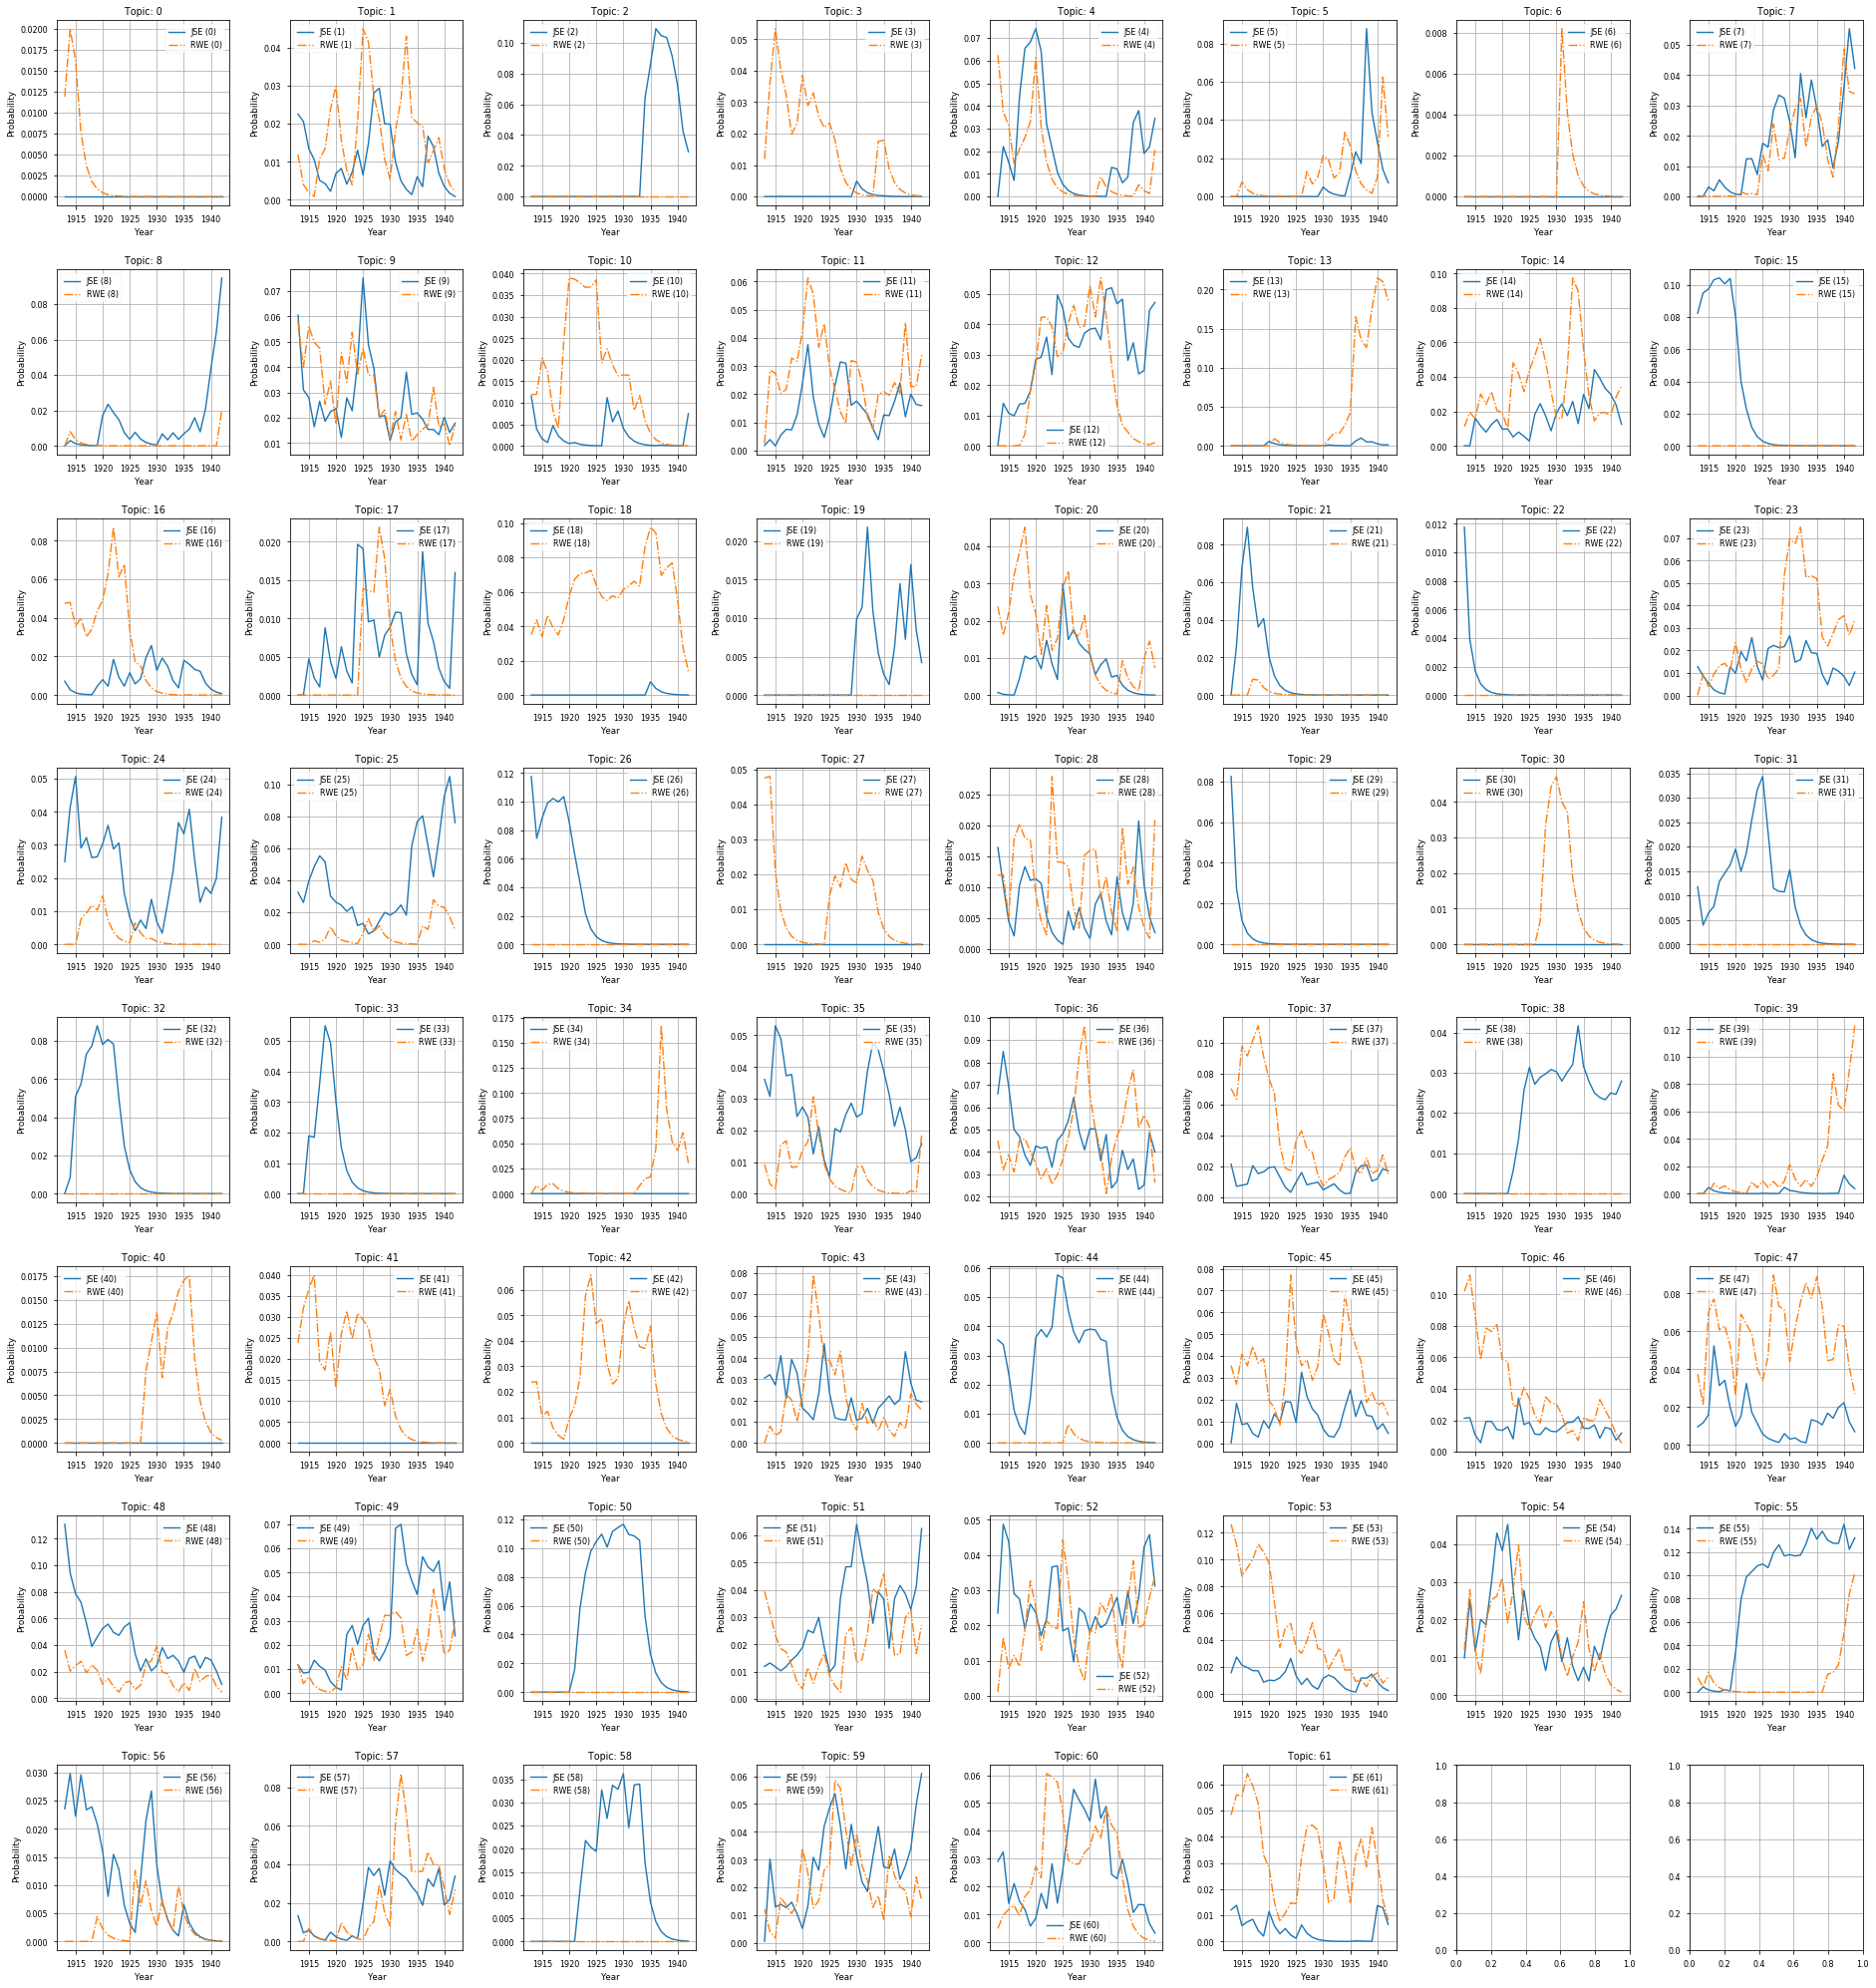

In [13]:
args['model'] = 'combined_corpus'

timelines_1 = pd.read_csv(args['output']+'/{}/timeline_overview_1.csv'.format(args['model']), index_col=0)
timelines_2 = pd.read_csv(args['output']+'/{}/timeline_overview_2.csv'.format(args['model']), index_col=0)

# determine number of rows and columns
root = np.sqrt(timelines_1.shape[1])
floor = np.floor(root).astype(int)
ceil = np.ceil(root).astype(int)

if root - floor < 0.5:
    rows, cols = ceil, floor
else:
    rows, cols = ceil, ceil
    
args['rows']=  rows
args['cols']= cols


# plot timeline overview
timelines_overview(timelines_1, timelines_2, args, grid=True, title=None)

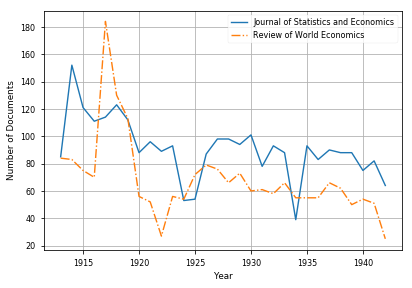

In [14]:
data1.groupby('year').title.count().plot(label=args['name_corpus_one_long'])
data2.groupby('year').title.count().plot(label=args['name_corpus_two_long'], linestyle='-.')
plt.ylabel('Number of Documents')
plt.xlabel('Year')
plt.legend()


savepath = '{}/'.format(args['output'])
pvtm_utils.check_path(savepath)
for ending in ['png','pdf']:
    plt.savefig('{}documents_per_year.{}'.format(savepath, ending), bbox_inches='tight')

# word2vec topic description extractor

In [109]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


def get_vocabulary_from_tfidf(data, min_freq, max_freq):
    """ Popularity based prefiltering of words in a corpus."""
    print('start vectorizer')
    vec = TfidfVectorizer(min_df=min_freq,
                          max_df=max_freq,
                          )

    vec.fit(data)
    print('finished vectorizer')

    vocabulary = set(vec.vocabulary_.keys())
    print(len(vocabulary), 'words in the vocabulary')

    return vocabulary



def get_most_similar_words(model, center, vocabulary, topic,  topn=50):
    """
    Extract the most similar words to a given cluster center.
    """

    simis = model.wv.most_similar(positive = [center[topic]], topn=topn)
    sim_words = [sim[0] for sim in simis]
    sim_value = [sim[1] for sim in simis]
    
    stopfiltered = stop_filter(pop_filter(" ".join(sim_words), vocabulary), stopwordss)
    return pd.DataFrame(stopfiltered, columns=[topic])



def extract_label_candicates(data, topic, vocabulary, stopwords, ngram_size=2):
    """"""
    strings = data[data.gmm_top_topic == topic].title
    vect = CountVectorizer(ngram_range=(ngram_size,ngram_size))
    vect_fit = vect.fit_transform(strings)
    ngram_counts = pd.DataFrame(vect_fit.toarray().sum(axis=0))
    
    # identify relevant n-grams
    ngrams = [stop_filter(pop_filter(key, vocab=vocabulary), stops=stopwords) for key in vect.vocabulary_.keys()]
    ngrams = [gram  for gram in ngrams if len(gram) == ngram_size]
    ngrams = [" ".join(gram) for gram in ngrams]
    relevant_ngrams = pd.DataFrame([[vect.vocabulary_[gram], gram]for gram in ngrams], columns=['pos', 'ngram'])
    
    # merge ngram_counts and relevant n_grams to find the label candidades
    labels = pd.merge(relevant_ngrams, ngram_counts, left_on='pos', right_index=True)
    labels = labels.sort_values(0, ascending=False)

    return labels



def extract_labels(data, topics, path_to_vecs, args, name, ngram_size = 2):
    # load document vectors and center positions
    vecs = pd.read_csv('{}/vectors_with_center.tsv'.format(path_to_vecs), sep='\t', index_col=0, header=None)
    center = vecs.iloc[data.shape[0]:].values
    
    print('get tf-idf vocabulary..')
    vocabulary = get_vocabulary_from_tfidf(data.text.values, args['vectorizermin'], args['vectorizermax'])
    stopwords = pvtm_utils.get_all_stopwords()    
   
    labels = pd.concat([extract_label_candicates(data, topic, vocabulary, stopwords, ngram_size=ngram_size).iloc[:1] for topic in topics.index])
    labels = labels.reset_index(drop=True)
    labels.index.name = 'Topic {}'.format(name)
    
    return labels, vocabulary, vecs, center




def enrich_topic_dataframe(topics, data, labels, topic_words):
    
    topics['ngram_label'] = labels.ngram
    topics['best_title'] = topics.sim_docs_indx.apply(lambda x: x[0]).apply(lambda x: data.iloc[x].title)

    # if a title is longer than 5 words add a linebreak in the middle
    add_linebreak = lambda x: x[:len(x)//2] +['\n'] + x[len(x)//2:] if len(x) >5 else x
    topics['best_title_break'] = topics.best_title.apply(lambda x: x.split()).apply(add_linebreak).apply(" ".join)
    
    topics['best_words'] = topic_words.T.values.tolist()
    topics['best_words'] = topics['best_words'].apply(", ".join)
    topics['num_docs'] = data.groupby('gmm_top_topic').title.count().values
    topics['num_docs_rel'] = topics['num_docs'] / topics1['num_docs'].sum() * 100
    
    
    topics['min_year'] = data.groupby('gmm_top_topic').year.min()
    topics['max_year'] = data.groupby('gmm_top_topic').year.max()
    topics['topic'] = topics.index.values
    
    return topics




stopwordss = pvtm_utils.get_all_stopwords()
# anonymous functions to filter rare and common words from a string
pop_filter = lambda x, vocab : list(filter(lambda word: word in vocab, x.split()))
stop_filter = lambda x, stops : list(filter(lambda word: word not in stops, x))

labels1, vocabulary1, vecs1, center1 = extract_labels(data1, topics1, args['path1'], args, name = args['name_corpus_one'], ngram_size = 2)
labels2, vocabulary2, vecs2, center2 = extract_labels(data2, topics2, args['path2'], args, name = args['name_corpus_two'], ngram_size = 2)


topic_words1 = pd.concat([get_most_similar_words(model1, center1,vocabulary1, topic = topic, topn=50) for topic in topics1.index.values], axis=1).dropna().iloc[:10]
topic_words2 = pd.concat([get_most_similar_words(model2, center2,vocabulary2, topic = topic, topn=50) for topic in topics2.index.values], axis=1).dropna().iloc[:10]


topics1 = enrich_topic_dataframe(topics1, data1, labels1, topic_words1)
topics2 = enrich_topic_dataframe(topics2, data2, labels2, topic_words2)

pd.set_option('display.max_colwidth', -1)
print(topics1[['best_title', 'best_words', 'num_docs', 'num_docs_rel']].to_latex(float_format='%.2f').replace("\\\\",'\\\\ \midrule'))
print(topics2[['best_title', 'best_words', 'num_docs', 'num_docs_rel']].to_latex(float_format='%.2f').replace("\\\\",'\\\\ \midrule'))
pd.set_option('display.max_colwidth', 50)

get tf-idf vocabulary..
start vectorizer
finished vectorizer
22367 words in the vocabulary
get tf-idf vocabulary..
start vectorizer
finished vectorizer
32022 words in the vocabulary
\begin{tabular}{lllrr}
\toprule
{} &                                                                                                                                     best\_title &                                                                                                                                          best\_words &  num\_docs &  num\_docs\_rel \\ \midrule
\midrule
0  &  Das Aufkommen der landwirtschaftlichen Maschinen um die Wende des 18. und in der ersten Hälfte des 19. Jahrhunderts &  maschine, getreide, maschinen, getreides, küste, entfernungen, nördlich, wasser, acker, holz &  4 & 0.15 \\ \midrule
1  &  Studien über das Moratorium des Altertums und Mittelalters im Rahmen der gleichzeitigen Kreditwirtschaft. &  jahrhundert, bauern, fürsten, mittelalter, adel, könig, staedte, stadt, mitte

C:\Users\Dlenz\Anaconda3\envs\py35\lib\site-packages\gensim\matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.



In [103]:
df_gantt



In [127]:
import plotly.plotly as py
import plotly.figure_factory as ff

import pandas as pd

def topic_evolution_gantt(topics):

    ddd = topics[['topic','min_year', 'max_year', 'num_docs']].copy()
    ddd.columns = ['Task', 'Start', 'Finish', 'num_docs']
    # ddd[['Start', 'Finish']] = ddd[['Start', 'Finish']].apply(lambda x: str(x)+'-01-01')#.apply(lambda x: pd.to_datetime(x))
    ddd.Start = ddd.Start.apply(lambda x: str(x)+'-01-01').apply(pd.to_datetime)
    ddd.Finish = ddd.Finish.apply(lambda x: str(x)+'-01-01').apply(pd.to_datetime)
    ddd['span'] = ddd.Finish - ddd.Start
    ddd = ddd.sort_values(by='span', ascending=False)
    ddd = ddd.reset_index(drop=True)
    return ddd

ddd1 = topic_evolution_gantt(topics1)
ddd2 = topic_evolution_gantt(topics2)

fig = ff.create_gantt(ddd1, index_col='num_docs', show_colorbar=True,
                      bar_width=0.2, showgrid_x=True, showgrid_y=True, title='')
fig['layout']['xaxis']['rangeselector']={}
py.iplot(fig, filename='gantt-use-a-pandas-dataframe', world_readable=True)
# py.image.save_as(fig, 'test.pdf')

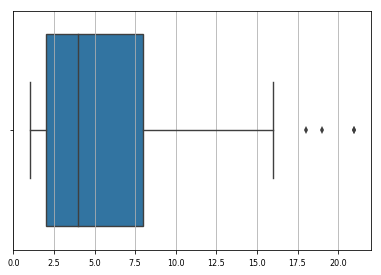

In [133]:
docs_per_year1 = pd.DataFrame(data1.groupby(['gmm_top_topic','year']).title.count()).unstack()
sns.boxplot(docs_per_year1.T)

# Heatmap, Clustermap

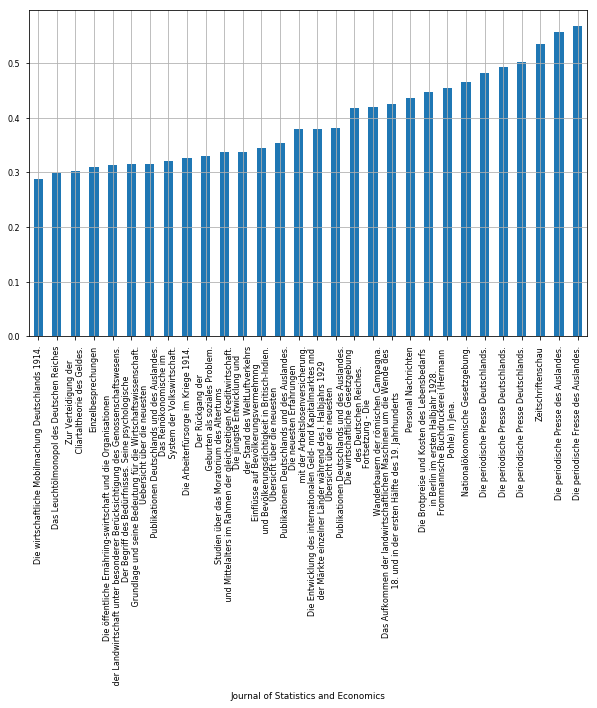

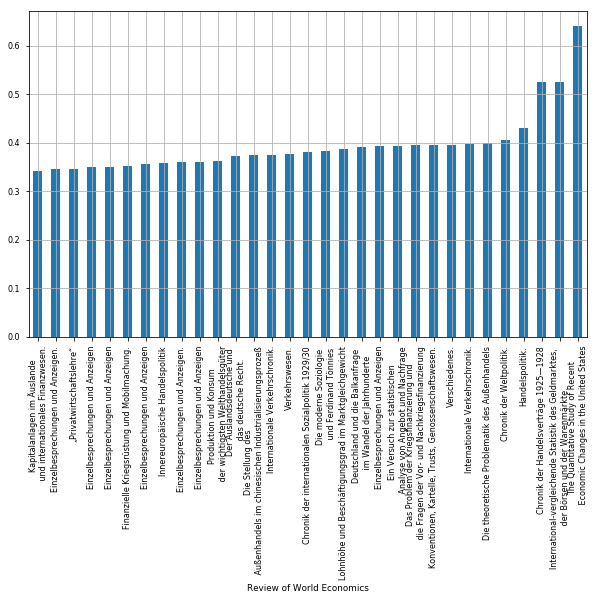

C:\Users\Dlenz\Anaconda3\envs\py35\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


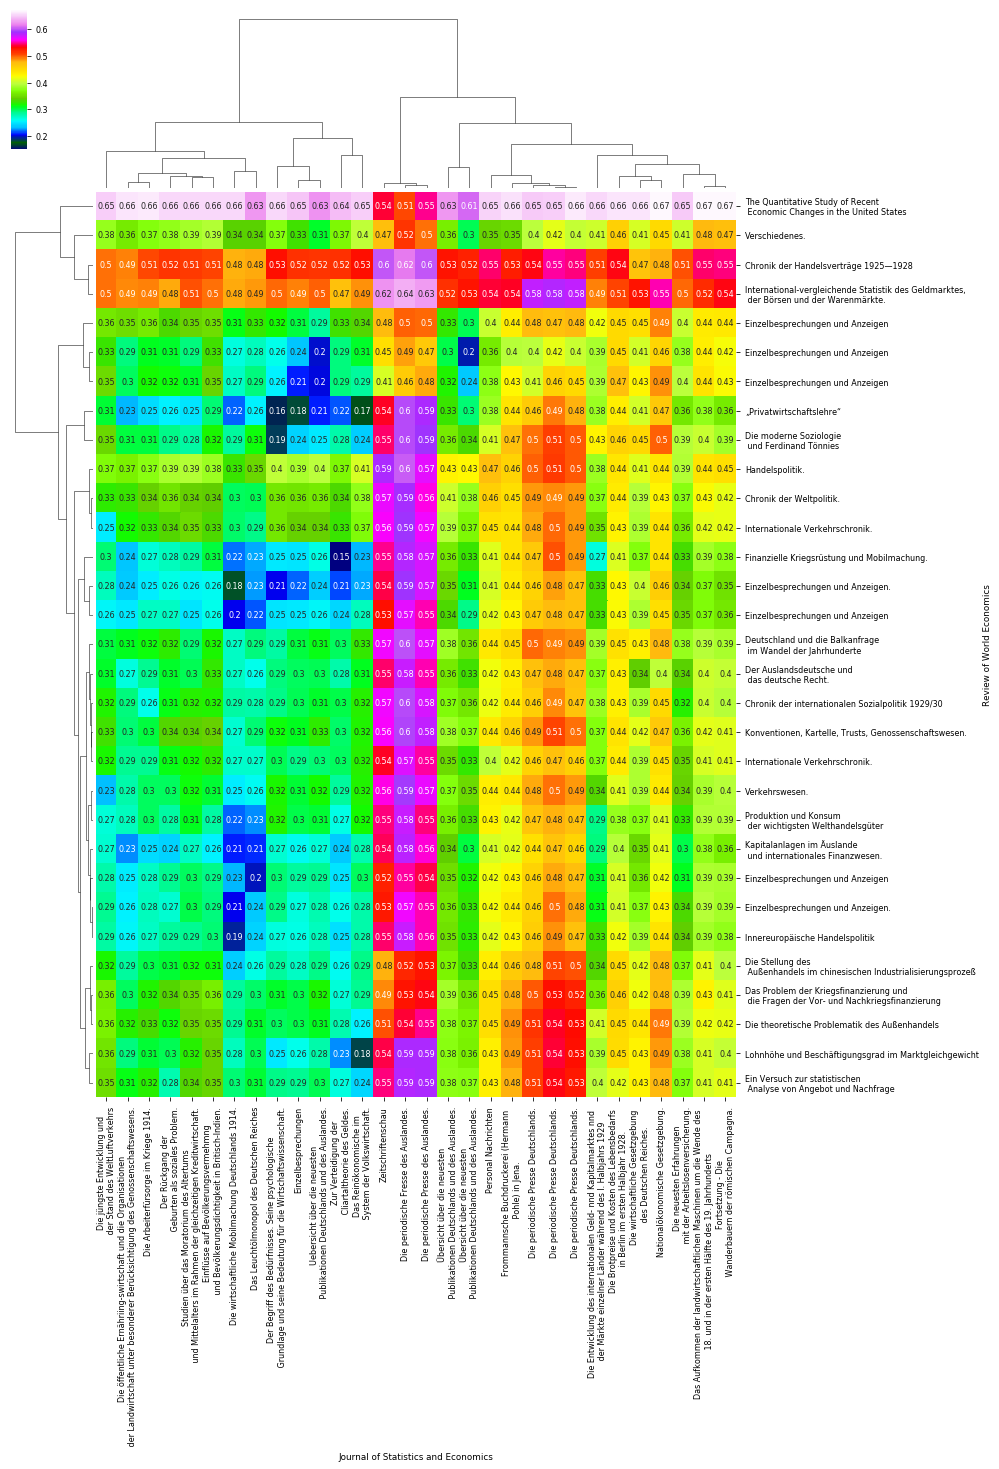

In [32]:
assignment_cost = pd.read_csv(args['output'] + '/matching/assignment_cost.csv', index_col='RWE')
assignment_cost.columns = topics1.best_title_break
assignment_cost.index = topics2.best_title_break
assignment_cost.columns.name = args['name_corpus_one_long']
assignment_cost.index.name = args['name_corpus_two_long']


# mean match per topic
assignment_cost.mean().sort_values().plot(kind='bar', color='C0', figsize=(10,6))
plt.show()
assignment_cost.mean(1).sort_values().plot(kind='bar', color='C0', figsize=(10,6))
plt.show()

# Clustermap
sns.clustermap(data=assignment_cost, cmap='gist_ncar', figsize=(13,20), annot=True, annot_kws={"size":8}, metric='cosine')
plt.tight_layout()
plt.savefig('{}/cluster_map.pdf'.format(args['output']),  bbox_inches="tight")
plt.show()

# Heatmap
# fig, ax = plt.subplots()
# # the size of A4 paper
# fig.set_size_inches(11.7*1.5, 8.27*1.5)
# sns.heatmap(data=assignment_cost, cmap='gist_ncar', annot=True,ax=ax, annot_kws={"size":8})
# fig.savefig('{}/heat_map.pdf'.format(args['output']),  bbox_inches="tight")

In [ ]:
topic_words1 = pd.concat([get_most_similar_words(model1, center1,vocabulary1, topic = topic, topn=50) for topic in topics1.index.values], axis=1).dropna()
topic_words2 = pd.concat([get_most_similar_words(model2, center2,vocabulary2, topic = topic, topn=50) for topic in topics2.index.values], axis=1).dropna()


In [ ]:
data1.title.sample(10).values

In [ ]:
pd.concat([pd.read_csv('outputs_paper/JSE_065/wordclouds/topic_{}.txt'.format(t), names=['0']).loc[:,'0'].value_counts() for t in range(1)]).sort_values(ascending=False).plot()

# Generate Word distribution from embedding similarities
Does not work too well..

In [ ]:
topic=1
topn=25
center=center1
import random

# get most similar words and their similarity
simis = model1.wv.most_similar(positive = [center[topic]], topn=topn)
sim_words = [sim[0] for sim in simis]
sim_values = [sim[1] for sim in simis]

# create dataframe but filter words that are not in the voab or are stopwords
words_df = pd.DataFrame([[word, value] for word, value in zip(sim_words, sim_values) if word in vocabulary1 and word not in stopwordss])
words_df.columns = ['word', 'sim'] 

# create a value for how often a word shall be written in the wordcloud text file
words_df['num_repetitions'] = words_df.sim.apply(lambda x: int(x * 30))


# new column with given number of reps per word
words_df.word = words_df.word.apply(lambda x: x + ' ')
words_df['word_list'] = words_df.num_repetitions * words_df.word

# make to list
list_of_words = words_df['word_list'].str.split().values.tolist()
# flat list
list_of_words = [item for sublist in list_of_words for item in sublist] 
# shuffle list
random.shuffle(list_of_words)


samples = random.sample(list(vocabulary1), 500)
neg_samples = [[sample]*random.randint(1,35) for sample in samples]
neg_samples = [item for sublist in neg_samples for item in sublist] 
random.shuffle(neg_samples)
neg_samples

wordlist = neg_samples + list_of_words
random.shuffle(wordlist)


with open('outputs_paper/sample_100/wordclouds/test.txt', "w", encoding="latin1") as textfile: #'{}/wordclouds/topic_{}.txt'.format(args['path'], i), 'w', encoding='utf-8') as textfile:
    textfile.write('\n'.join(wordlist))
    

# Sanity check for the cross model vector generation

In [ ]:
def test_document(model, tokens_list, steps = 1, alpha=0.025, verbose=False):

    ivec = model.infer_vector(doc_words=tokens_list, steps=steps, alpha=alpha)
    similar_documents = model.docvecs.most_similar(positive=[ivec], topn=10)
    if verbose:
        print(similar_documents)
    return similar_documents[0][0]



def doc2vec_sanity_check(model, list_of_tokens, steps = 1, alpha=0.025, verbose=False):

    k = 0
    for i, tokens_list in enumerate(list_of_tokens):
        result = test_document(model, tokens_list, steps=steps, alpha=alpha, verbose=verbose)
        if i == result:
            k+= 1
    print(k/(i+1)*100, '% correct.')        
    return k


list_of_tokens = data1.data.values[:100]
doc2vec_sanity_check(model1, list_of_tokens, steps = 1, alpha=0.025, verbose=False)


In [ ]:
args['model'] = 'cross_model'
import cross_model as cm
# create cross model document embeddings and topic memberships
print('create cross model document embeddings and topic memberships')
c1m1_vecs, c1m1_memb = cm.cross_modeling(data1, model1, gmm1, args, same=True)
c1m2_vecs, c1m2_memb = cm.cross_modeling(data1, model2, gmm2, args)
c2m1_vecs, c2m1_memb = cm.cross_modeling(data2, model1, gmm1, args)
c2m2_vecs, c2m2_memb = cm.cross_modeling(data2, model2, gmm2, args, same=True)

# aggregate topic probabilites
print('aggregate topic probabilites')
c1m1_probas, c1m1_importance = cm.aggregate_topic_probas(data1, c1m1_memb, args)
c1m2_probas, c1m2_importance = cm.aggregate_topic_probas(data1, c1m2_memb, args)
c2m1_probas, c2m1_importance = cm.aggregate_topic_probas(data2, c2m1_memb, args)
c2m2_probas, c2m2_importance = cm.aggregate_topic_probas(data2, c2m2_memb, args)

In [ ]:

f, (ax1, ax2) = plt.subplots(2, 1, sharey=True, squeeze=False, )#figsize=(args['cols'] * 3.7, args['rows'] * 4))
pd.DataFrame(c1m1_memb.mean(0)).plot(kind='bar', ax=ax1[0], label = "c1m1")
pd.DataFrame(c2m2_memb.mean(0)).plot(kind='bar', ax=ax2[0], label = "c2m2")

In [ ]:

f, (ax1, ax2) = plt.subplots(2, 1, sharey=True, squeeze=False, )#figsize=(args['cols'] * 3.7, args['rows'] * 4))
pd.DataFrame(c2m1_memb.mean(0)).plot(kind='bar', ax=ax1[0], label = "c2m1")
pd.DataFrame(c1m2_memb.mean(0)).plot(kind='bar', ax=ax2[0], label = "c1m2")

In [ ]:
# model1.infer_vector()
data1.iloc[:10].data.apply(" ".join).apply(model1.infer_vector)
%time docvecs = np.array([model1.infer_vector(x) for x in data1.iloc[:10].data.apply(" ".join)])

In [ ]:
%time docvecs = np.array([model1.infer_vector(x, epochs=10) for x in data2['data'].apply(" ".join).values])
docvecs.shape

# 
new

In [ ]:
gmm1.predict(np.array(das))
# data1.data.values.shape

In [ ]:
from pvtm import stopwords_generator as sg
from sklearn.feature_extraction.text import TfidfVectorizer


def get_allowed_vocab(data, args, min_df=0.05, max_df=0.95):
    
    """
    Takes a df with a "text" column.
    Result is a vocabulary based on the corpora from the input dataset.
    Pre-filtering is done using sklearns tfidfVectorizer with settings for min_df and max_df defined in the args dict.
    """
    vec = TfidfVectorizer(min_df=min_df, max_df=max_df)
    
    # fit on dataset
    vec.fit(data)
    # get vocabulary
    vocabulary = set(vec.vocabulary_.keys())
    print(len(vocabulary), 'words in the vocabulary')
    return vocabulary






def popularity_based_prefiltering(data, args, min_df=0.05, max_df=0.95):
    # popularity based pre-filtering. Ignore rare and common words. And we don't want stopwords and digits.
    
    
    stopwords, language = sg.get_all_stopwords(data[0])
    vocabulary = get_allowed_vocab(data, args, min_df=min_df, max_df=max_df)
    
    
    pp = []
    for i, line in enumerate(data):
        rare_removed = list(filter(lambda word: word in vocabulary, line.split()))

        stops_removed = [word.strip() for word in rare_removed if word not in stopwords and not word.isdigit()]
        pp.append(stops_removed)
        
    return pp


# 3D Scatter

In [ ]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

Y = tsne(vecs_with_center1.values, dimensions=3, perplexity=args["tsne_perplexity"])

fig = pyplot.figure(frameon=False,figsize=(8,5))
ax = Axes3D(fig)

ax.scatter(Y[:len(vectors1), 0], Y[:len(vectors1), 1], Y[:len(vectors1), 2],s=1, c='b', marker='^')
ax.scatter(Y[len(vectors1):, 0], Y[len(vectors1):, 1], Y[len(vectors1):, 2],s=20, c='r', marker='^')
# pyplot.axis('off')
xmax, ymax, zmax = Y[:len(vectors1), 0].max(), Y[:len(vectors1), 1].max(), Y[:len(vectors1), 2].max()
xmin, ymin, zmin = Y[:len(vectors1), 0].min(), Y[:len(vectors1), 1].min(), Y[:len(vectors1), 2].min()


ax.set_xlim(xmin+4, xmax-4)
ax.set_ylim(ymin+4, ymax-4)
ax.set_zlim(zmin+4, zmax-4)
pyplot.savefig('3d.svg', bbox_inches='tight')
cc.pvtm_utils.svg_to_pdf('3d.svg')

In [ ]:
import numpy as np
import pandas as pd
docvecsdf = data1.data.apply(model2.infer_vector)
# docvecsdf = data1.data.apply(lambda x: " ".join(y for y in x)).apply(model1.infer_vector)


# np.array with correct shape from pandas series
docvecs = np.array(docvecsdf.values.tolist()).astype('float64')

# predict topic membership distributions for generated document vectors
gmm_probas = gmm1.predict_proba(docvecs)

In [ ]:
# bhtnse
from bhtsne import tsne
print('Bhtsne..')
Y = tsne(docvecs.astype('float64'))

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(Y[:, 0], Y[:, 1], s=0.3)

In [ ]:
topics1

In [ ]:
import pandas as pd
topics2.sim_words.apply(pd.Series).T

In [ ]:
data3.loc[data1.index, 'source'] = args['name_corpus_one']
data3.loc[data2.index, 'source'] = args['name_corpus_two']

In [ ]:
data3.to_csv(args['path3']+'/documents.csv')

In [ ]:
model, gmm, data, topics = cc.pvtm_utils.load_pvtm_outputs(args['path3'])

In [ ]:
# split data in original corpora
data1 = data[data.source == args['name_corpus_one']].copy()
# data2 = data[data.source == args['name_corpus_two']].copy()
print(data1.shape)
try:
    print('Barnes-Hut tsne map')
    cc.cc.combined_bhtsne(data1, data2, args)
except Exception as e:
    print('Failed to plot bhtsne comparison map due to')
    print(e)

print('get importance measures')
importance1 = cc.pvtm_utils.get_topic_importance_df(args['agg_lvl'], data1)
importance2 = cc.pvtm_utils.get_topic_importance_df(args['agg_lvl'], data2)

print('timelines')
cc.timelines_overview(importance1, importance2, args)

print('topic comparison')
cc.topic_timeline_comparison_plot(importance1, importance2, args, model='combined_corpus')

print('Topic importance barchart..')
df = cc.topic_importance_barchart(importance1, importance2, args, modelname=args['model'])

print('Finished combined corpus approach')